In [49]:
import os, sys
sys.path.append(os.path.abspath("../"))

import pandas as pd

from sklearn.model_selection import train_test_split
from utils.bootcampviztools import *
from utils.toolbox_ML import *
from utils.funciones import *


### REVISIÓN INICIAL DEL DATASET

In [50]:
df = pd.read_csv("../data_sample/Datos_Reservas.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155665 entries, 0 to 155664
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   res_ID          155665 non-null  int64  
 1   daily_price     155665 non-null  float64
 2   lead_time       155665 non-null  int64  
 3   adults          155665 non-null  int64  
 4   children        155665 non-null  int64  
 5   repeated_guest  155665 non-null  int64  
 6   total_book      155665 non-null  int64  
 7   pre_cancel      155665 non-null  int64  
 8   arr_date        155665 non-null  object 
 9   arr_week        155665 non-null  int64  
 10  week_nights     155665 non-null  int64  
 11  weekend_nights  155665 non-null  int64  
 12  meal_plan       154496 non-null  object 
 13  room_type       155665 non-null  object 
 14  parking         155665 non-null  int64  
 15  special_req     155665 non-null  int64  
 16  ms_type         155663 non-null  object 
 17  canceled  

In [51]:
df.sample(10)

,res_ID,daily_price,lead_time,adults,children,repeated_guest,total_book,pre_cancel,arr_date,arr_week,week_nights,weekend_nights,meal_plan,room_type,parking,special_req,ms_type,canceled
26805,26805,100.00,164,1,0,0,0,0,2017-10-02,40,2,0,BB,Room_Type 1,0,0,Offline,0
143923,143923,109.00,12,1,0,0,0,0,2017-03-15,11,1,0,BB,A,1,0,Offline,0
6437,6437,134.17,4,2,1,0,0,0,2017-08-17,33,5,1,BB,Room_Type 1,0,2,Online,1
50984,50984,40.05,259,2,0,0,1,1,2015-09-17,38,3,0,BB,A,0,0,Groups,1
117647,117647,72.25,292,2,0,0,1,1,2015-12-26,52,4,2,BB,A,0,1,Online,1
97480,97480,79.20,120,2,0,0,0,0,2016-12-04,48,1,2,SC,A,0,0,Online,1
150957,150957,220.00,136,2,2,0,0,0,2017-06-24,25,1,1,BB,F,0,0,Online,0
87682,87682,80.00,322,2,0,0,0,0,2016-05-19,20,3,1,BB,A,0,0,Offline,1
94234,94234,108.00,48,2,0,0,0,0,2016-10-04,40,3,0,SC,A,0,1,Online,1
78909,78909,76.80,5,2,0,0,0,0,2015-09-08,37,4,0,SC,A,0,0,Offline,0


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
res_ID,155665.0,77832.000000,44936.759164,0.00,38916.0,77832.0,116748.0,155664.0
daily_price,155665.0,102.202207,47.393049,-6.38,73.0,95.0,125.0,5400.0
lead_time,155665.0,99.635332,102.675540,0.00,18.0,66.0,153.0,737.0
adults,155665.0,1.853737,0.565750,0.00,2.0,2.0,2.0,55.0
children,155665.0,0.104211,0.399512,0.00,0.0,0.0,0.0,10.0
repeated_guest,155665.0,0.030450,0.171823,0.00,0.0,0.0,0.0,1.0
total_book,155665.0,0.213156,1.858170,0.00,0.0,0.0,0.0,78.0
pre_cancel,155665.0,0.072258,0.760996,0.00,0.0,0.0,0.0,26.0
arr_week,155665.0,27.594655,13.608094,1.00,17.0,28.0,39.0,53.0
week_nights,155665.0,2.431324,1.809001,0.00,1.0,2.0,3.0,50.0


In [53]:
if len(df[df.duplicated()]) == 0:
    print("No hay registros duplicados")
else:
    print(f"Hay {len(df[df.duplicated()])} registros duplicados")

No hay registros duplicados


<div style="background-color: #e6f3ff;">

---

##### **DESCRIPCIÓN DE LAS VARIABLES**

---
<div style="background-color: AliceBlue;">

| Variable | Tipo | Descripción |
|:---------|:----:|:------------|
| res_ID | int64 | Identificador único de la reserva.|
| daily_price | float64 | Precio diario medio de la reserva efectuada, en euros.|
| lead_time | int64 | Días transcurridos entre la fecha de reserva y el día previsto de llegada.| 
| adults | int64 |---|
| children | int64 |---| 
| repeated_guest | int64 |---| 
| total_book | int64 |---| 
| pre_cancel | int64 |---| 
| arr_date | datetime64 |---|
| arr_week | int64 |---|
| week_nights | int64 |---|
| weekend_nights | int64 |---|
| meal_plan | object |---|
| room_type | object |---|
| parking | int64 |---|
| special_req | int64 |---|
| ms_type | object |---|
| canceled | int64 |---|

</div>

---

<div style="text-align: left;background-color: #e6f3ff;">

En un primer vistazo a los datos del dataset no se aprecian valores nulos ni registros duplicados, aunque se <br>
realizará una inspección más a fondo por si se encontrara alguna inconsistencia en los datos.<br><br>
El primer paso será identificar la variable 'target' y separar los datos en los sets de train y test para evitar el<br>
análisis accidental del dataset de testeto.<br><br>

---
</div>

About columns

    ID : unique identifier of each booking
    n_adults : Number of adults
    n_children : Number of Children
    weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
    week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
    meal_plan : Type of meal plan booked by the customer:
    car_parking_space : Does the customer require a car parking space? (0 - No, 1- Yes)
    room_type : Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
    lead_time : Number of days between the date of booking and the arrival date
    year : Year of arrival date
    month : Month of arrival date
    date : Date of the month
    market_segment : Market segment designation.
    repeated_guest : Is the customer a repeated guest? (0 - No, 1- Yes)
    previous_cancellations : Number of previous bookings that were canceled by the customer prior to the current booking
    previous_bookings_not_canceled : Number of previous bookings not canceled by the customer prior to the current booking
    avg_room_price : Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
    special_requests : Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
    status : Flag indicating if the booking was canceled or not.


### SEPARO LOS DATOS EN CONJUNTOS DE TRAIN Y TEST

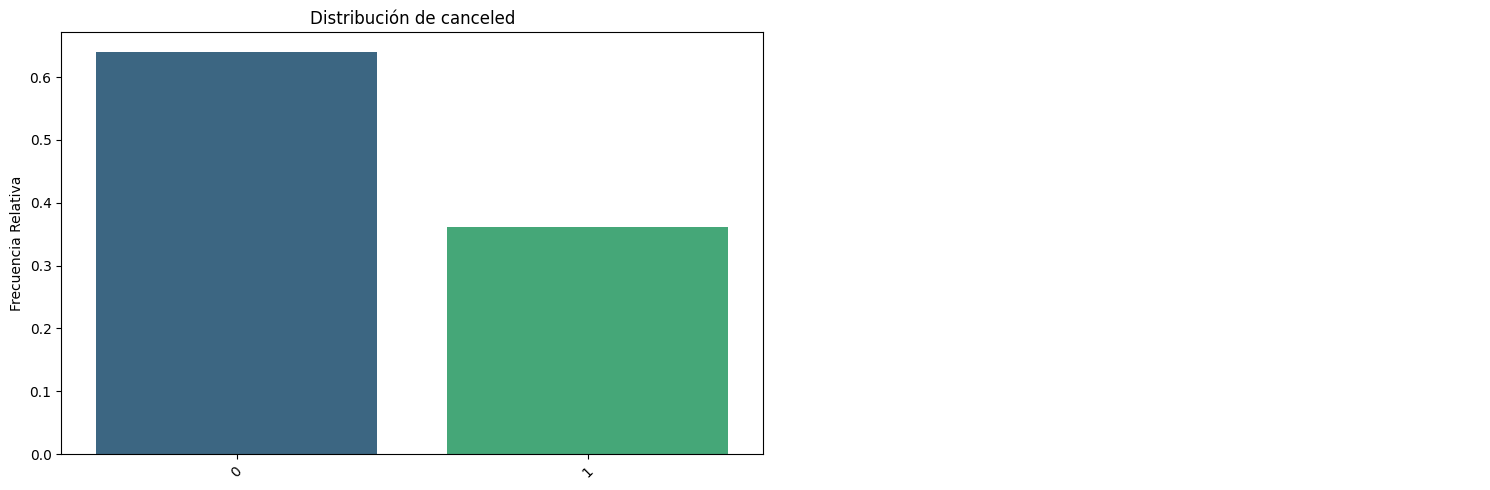

In [55]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
target = "canceled"

train_set[target].value_counts()
pinta_distribucion_categoricas(train_set, [target], relativa = True)

In [56]:
df_tip = tipifica_variables(train_set, 11, 0.05)
df_tip

,nombre_variable,tipo_sugerido
0,res_ID,Numérica Continua
1,daily_price,Numérica Continua
2,lead_time,Numérica Continua
3,adults,Numérica Discreta
4,children,Categorica
5,repeated_guest,Binaria
6,total_book,Numérica Continua
7,pre_cancel,Numérica Discreta
8,arr_date,Numérica Continua
9,arr_week,Numérica Discreta


In [19]:
lista_cat = df_tip.loc[(df_tip.tipo_sugerido == "Categorica")|(df_tip.tipo_sugerido == "Binaria")]["nombre_variable"].tolist()
lista_cat.remove(target)
lista_cat

['adults',
 'children',
 'repeated_guest',
 'meal_plan',
 'parking',
 'special_req',
 'ms_type']

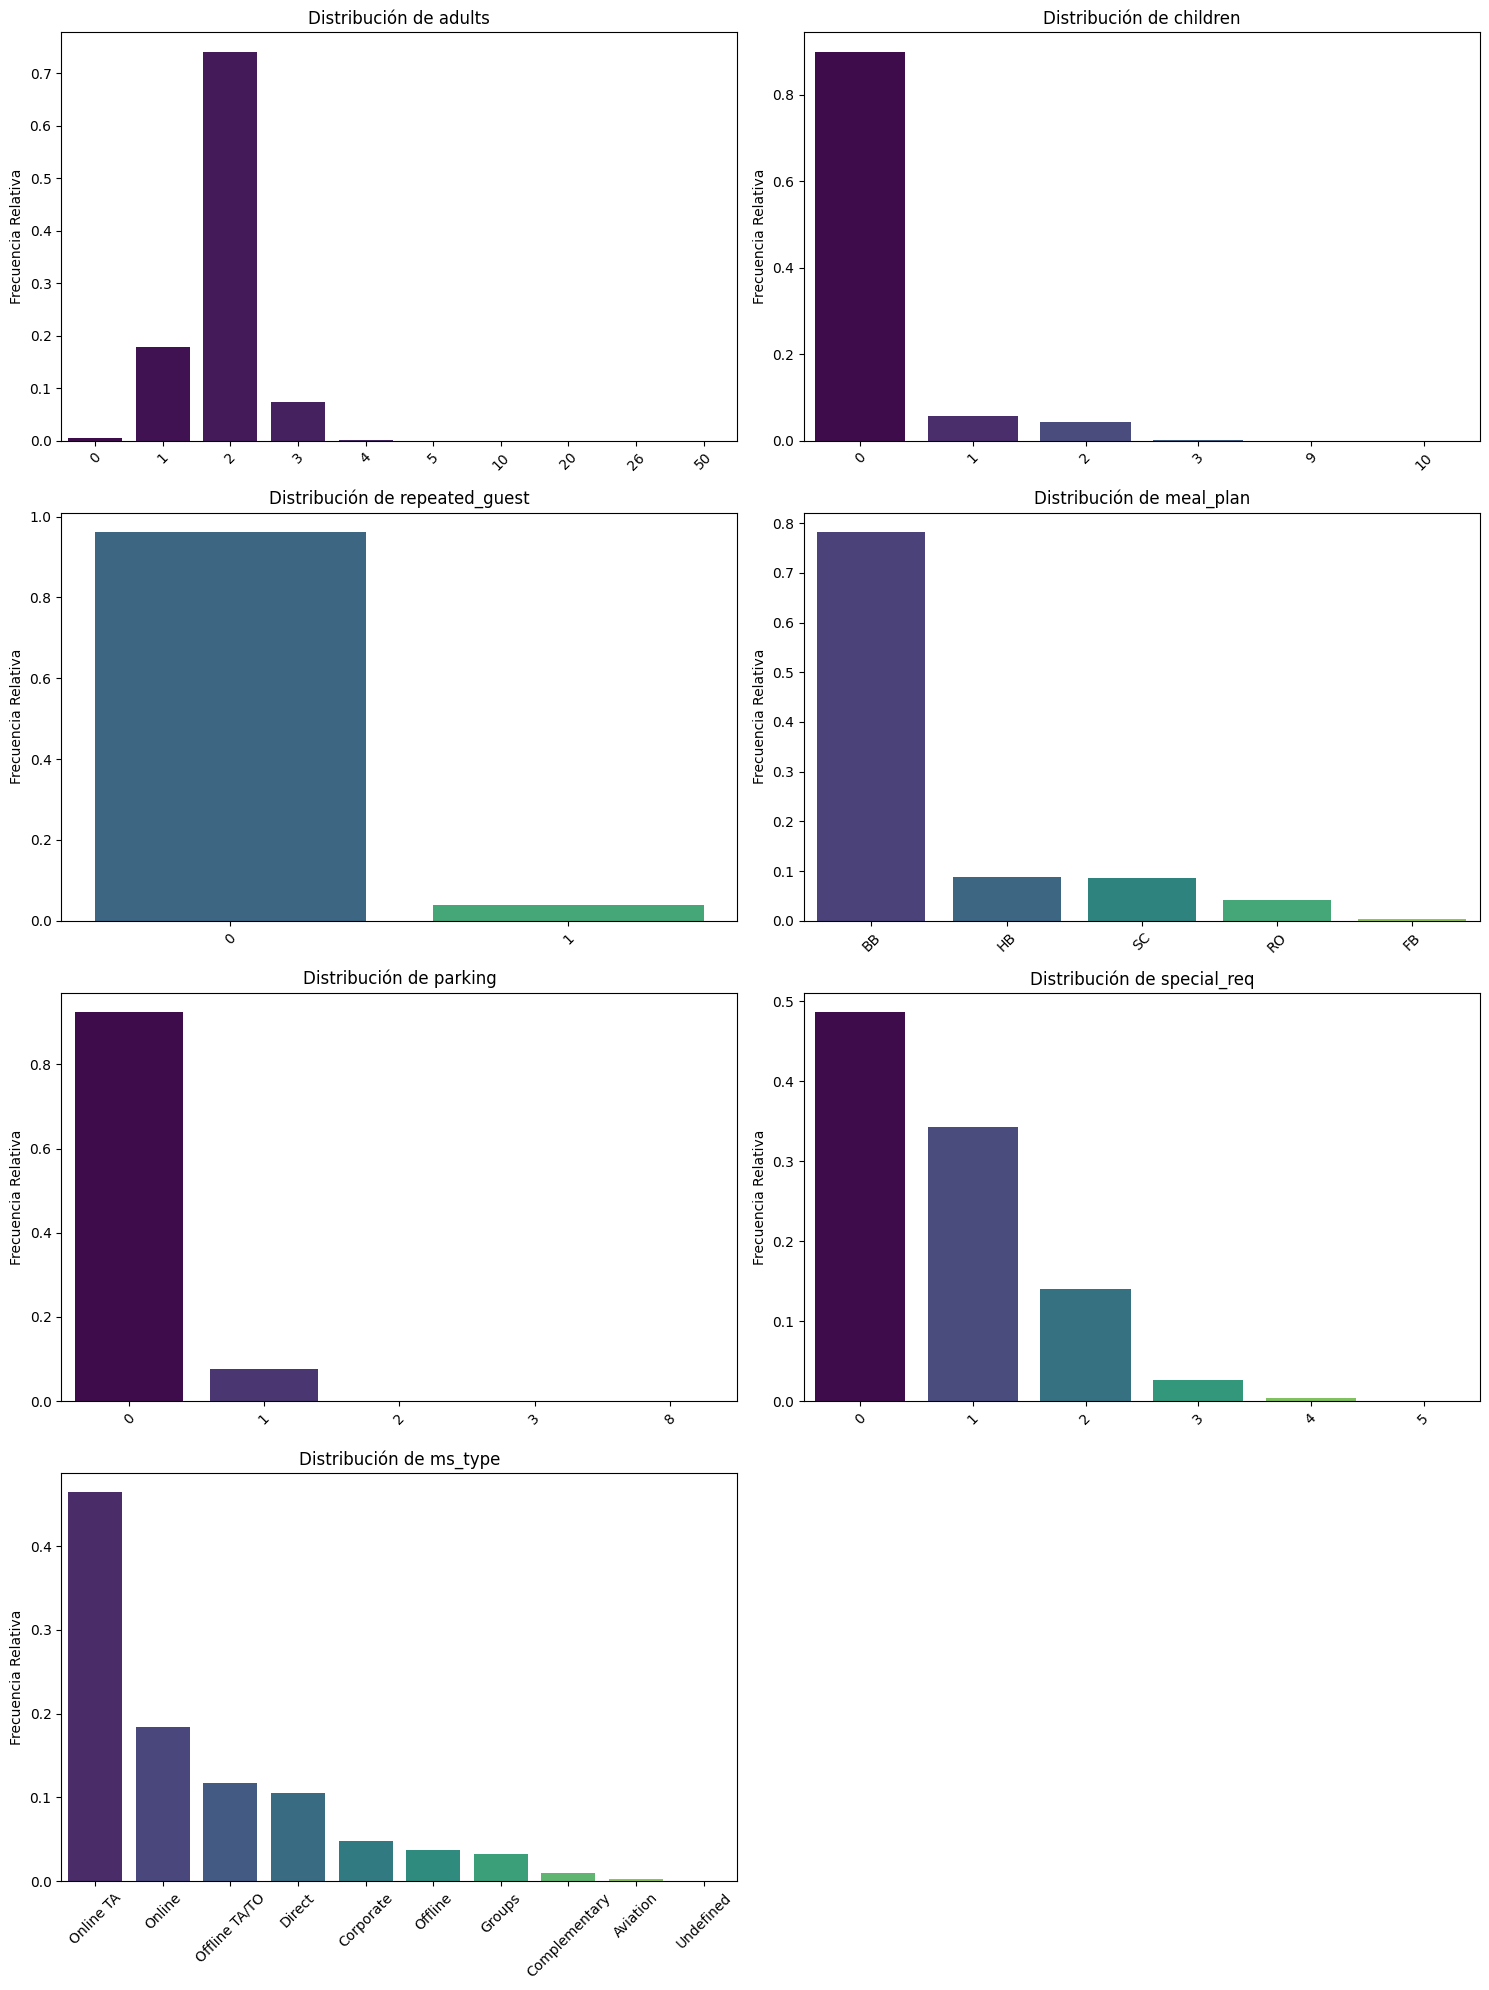

In [20]:
pinta_distribucion_categoricas(train_set, lista_cat, relativa = True, mostrar_valores = False, giro = 45)

In [21]:
lista_num = df_tip.loc[(df_tip.tipo_sugerido != "Categorica")&(df_tip.tipo_sugerido != "Binaria")]["nombre_variable"].tolist()
lista_num

['daily_price',
 'lead_time',
 'total_book',
 'pre_cancel',
 'arr_date',
 'arr_week',
 'week_nights',
 'weekend_nights',
 'room_type']

In [22]:
for col in train_set.columns:
    print(train_set[col].value_counts(),"\n")

daily_price
0.00      1749
65.00     1339
75.00     1247
85.00      866
95.00      849
          ... 
199.15       1
186.75       1
75.03        1
202.05       1
165.23       1
Name: count, Length: 8144, dtype: int64 

lead_time
0      5496
1      3172
2      1990
3      1791
4      1647
       ... 
507       1
410       1
387       1
521       1
375       1
Name: count, Length: 474, dtype: int64 

adults
2     64645
1     15618
3      6477
0       413
4        59
26        4
5         2
20        2
50        1
10        1
Name: count, dtype: int64 

children
0     78500
1      4929
2      3716
3        74
10        2
9         1
Name: count, dtype: int64 

repeated_guest
0    83886
1     3336
Name: count, dtype: int64 

total_book
0     82939
1      2083
2       573
3       323
4       235
      ...  
70        1
67        1
55        1
73        1
65        1
Name: count, Length: 73, dtype: int64 

pre_cancel
0     85679
1      1214
2       126
3        74
11       43
4        34
5  

### TRANSFORMACIONES

In [60]:
# TRANSFORMACIONES A OTRAS CATEGÓRICAS

# Convierto en binarias las variables 'children' y 'parking'
lista_cambios = ["children","parking"]
for col in lista_cambios:
    cambiar_numerica_binaria (df,col)

In [61]:
df.parking.value_counts()

parking
0    147125
1      8540
Name: count, dtype: int64

In [62]:
df.children.value_counts()

children
0    144377
1     11288
Name: count, dtype: int64

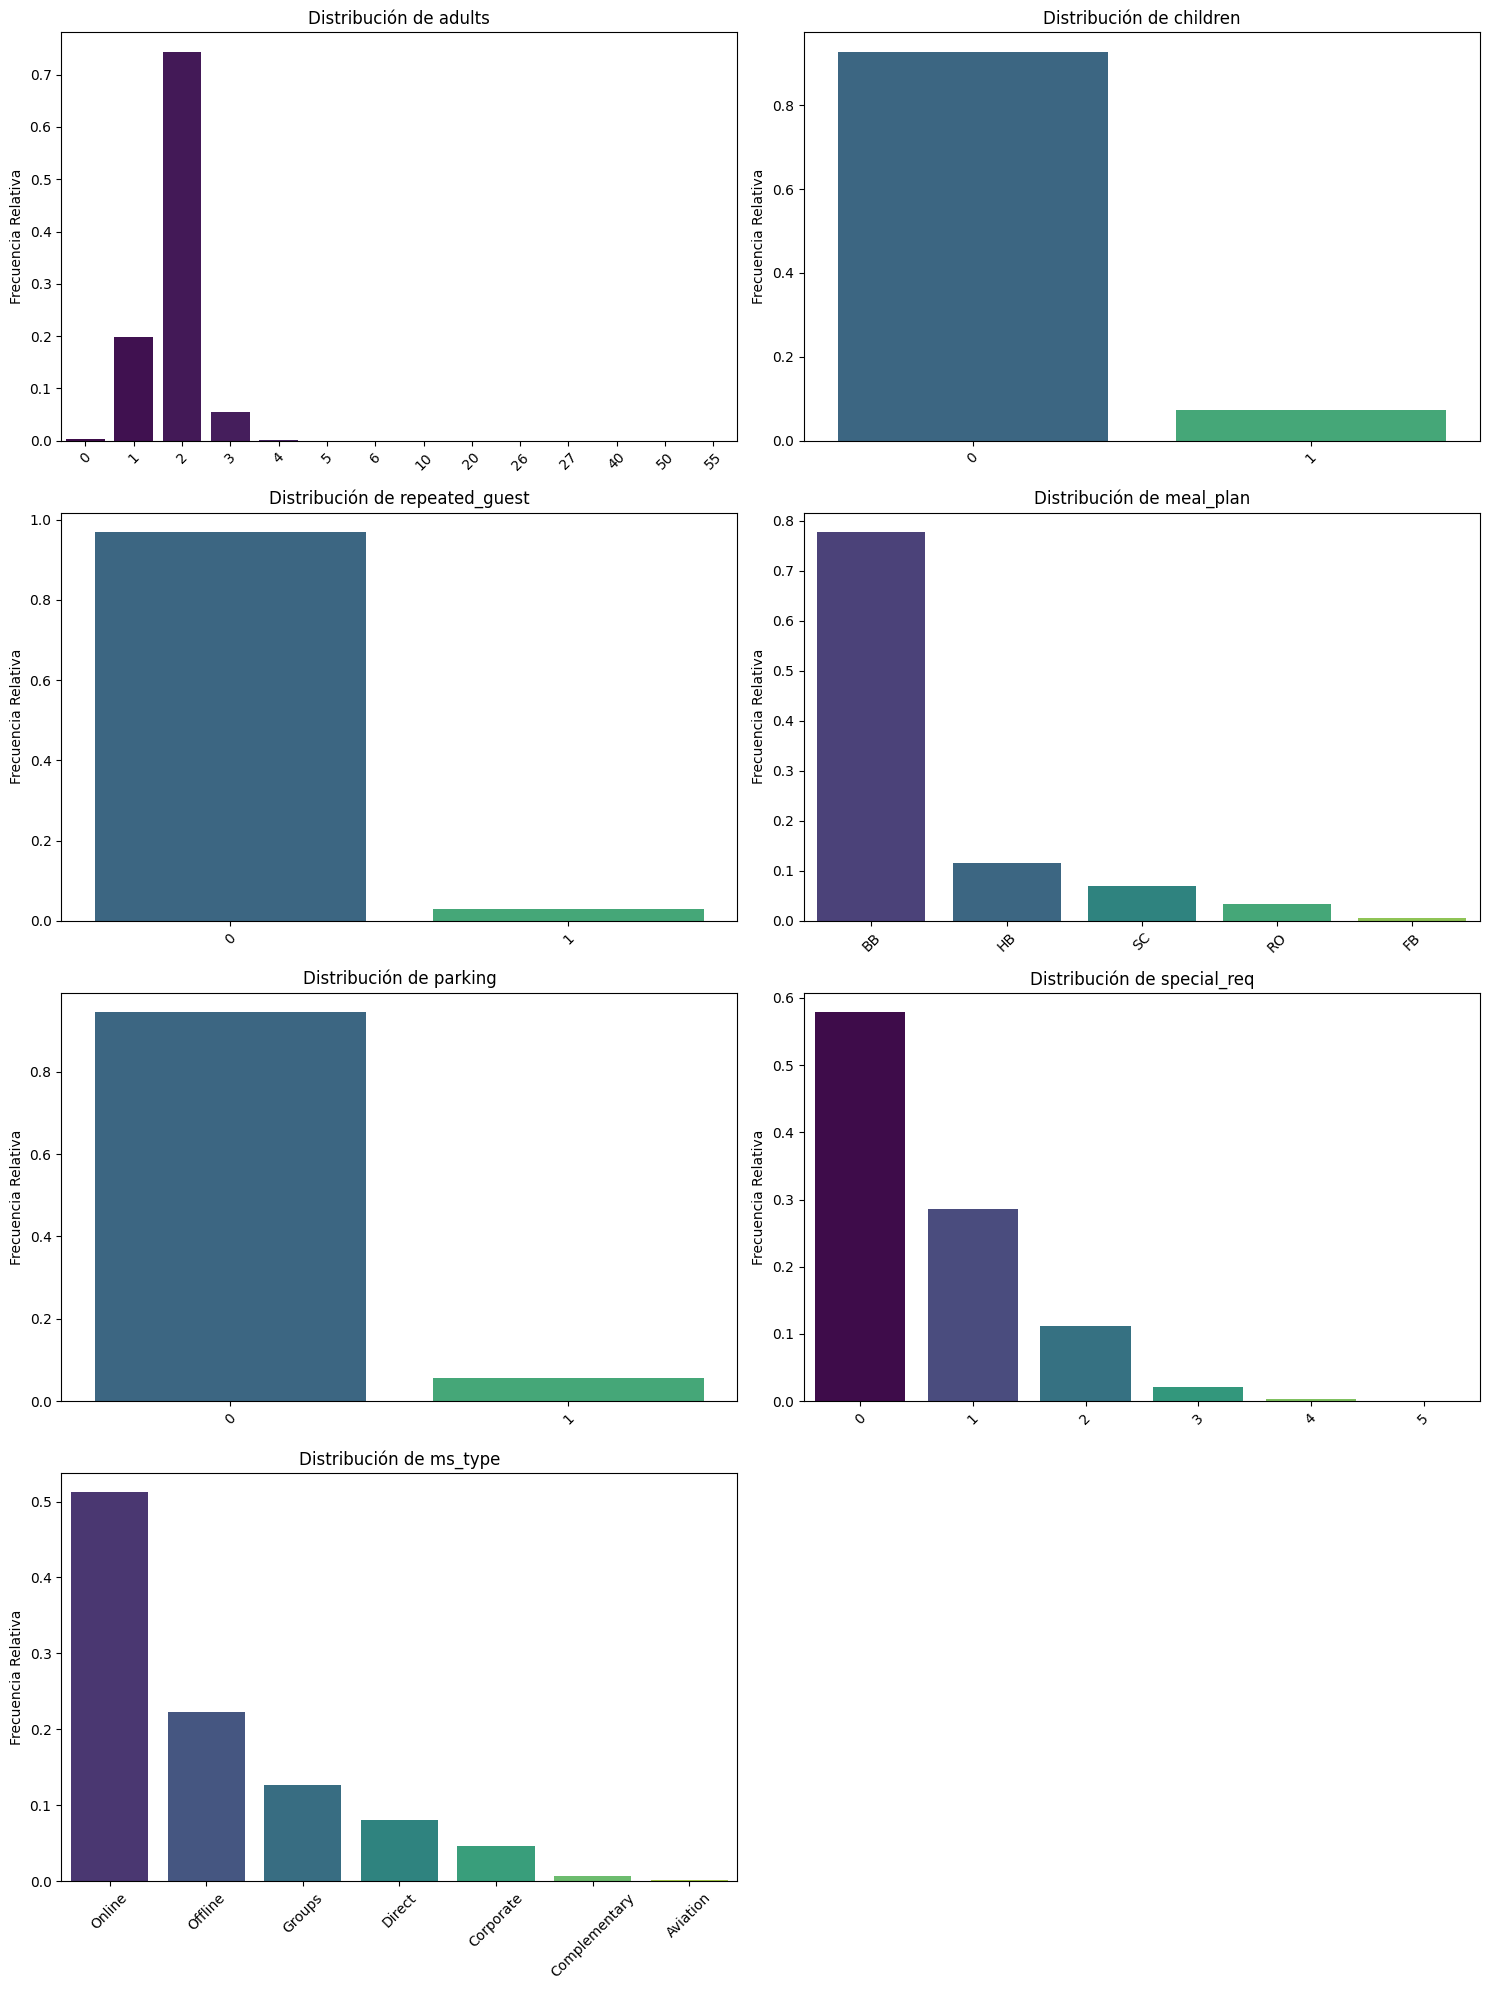

In [64]:
pinta_distribucion_categoricas(df, lista_cat, relativa = True, mostrar_valores = False, giro = 45)